### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal, the name of the country where each customer resides.

In [1]:
!pip install squarify

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [3]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ecommerce retail.xlsx")

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
print('Dataframe dimension: ', data.shape)

Dataframe dimension:  (541909, 8)


In [7]:
data = data.dropna(subset=['CustomerID'], axis=0).drop_duplicates()
print('Dataframe dimension after dropping null CustomerIDs and duplicate rows: ', data.shape)

Dataframe dimension after dropping null CustomerIDs and duplicate rows:  (401604, 8)


In [8]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  int64         
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.6+ MB


In [10]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [11]:
cancelled = data[data['Quantity'] < 0]
# cancelled transactions can also be filtered by InvoiceNo starting with letter "C"

cancelled['Loss'] = cancelled['Quantity'] * cancelled['UnitPrice']
cancelled

<ipython-input-11-246560c4adc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled['Loss'] = cancelled['Quantity'] * cancelled['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Loss
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [12]:
agg_cancelled = cancelled.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate': 'max',
                                                                               'Loss': 'sum'}).reset_index()
agg_cancelled

,InvoiceNo,Country,CustomerID,InvoiceDate,Loss
0,C536379,United Kingdom,14527,2010-12-01 09:41:00,-27.50
1,C536383,United Kingdom,15311,2010-12-01 09:49:00,-4.65
2,C536391,United Kingdom,17548,2010-12-01 10:24:00,-141.48
3,C536506,United Kingdom,17897,2010-12-01 12:38:00,-25.50
4,C536543,United Kingdom,17841,2010-12-01 14:30:00,-3.80
...,...,...,...,...,...
3649,C581484,United Kingdom,16446,2011-12-09 09:27:00,-168469.60
3650,C581490,United Kingdom,14397,2011-12-09 09:57:00,-32.53
3651,C581499,United Kingdom,15498,2011-12-09 10:28:00,-224.69
3652,C581568,United Kingdom,15311,2011-12-09 11:57:00,-54.75


In [13]:
delivered = data[data['Quantity'] >= 0]
delivered['InvoiceNo'] = delivered['InvoiceNo'].astype(int)
delivered['Revenue'] = delivered['Quantity'] * delivered['UnitPrice']
delivered

<ipython-input-13-0e85e3ce13aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['InvoiceNo'] = delivered['InvoiceNo'].astype(int)
<ipython-input-13-0e85e3ce13aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered['Revenue'] = delivered['Quantity'] * delivered['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [14]:
agg_delivered = delivered.groupby(['InvoiceNo', 'Country', 'CustomerID']).agg({'InvoiceDate': 'max',
                                                                              'Revenue': 'sum'}).reset_index()
agg_delivered


,InvoiceNo,Country,CustomerID,InvoiceDate,Revenue
0,536365,United Kingdom,17850,2010-12-01 08:26:00,139.12
1,536366,United Kingdom,17850,2010-12-01 08:28:00,22.20
2,536367,United Kingdom,13047,2010-12-01 08:34:00,278.73
3,536368,United Kingdom,13047,2010-12-01 08:34:00,70.05
4,536369,United Kingdom,13047,2010-12-01 08:35:00,17.85
...,...,...,...,...,...
18531,581583,United Kingdom,13777,2011-12-09 12:23:00,124.60
18532,581584,United Kingdom,13777,2011-12-09 12:25:00,140.64
18533,581585,United Kingdom,15804,2011-12-09 12:31:00,329.05
18534,581586,United Kingdom,13113,2011-12-09 12:49:00,339.20


In [15]:
agg_delivered.describe()

,InvoiceNo,CustomerID,Revenue
count,18536.000000,18536.000000,18536.000000
mean,559527.999407,15266.224158,479.456673
std,13040.283892,1734.178524,1677.916285
min,536365.000000,12346.000000,0.000000
25%,548352.500000,13773.500000,157.200000
50%,559818.500000,15176.500000,302.565000
75%,570834.500000,16779.000000,469.467500
max,581587.000000,18287.000000,168469.600000


In [16]:
print(agg_delivered.shape)

(18536, 5)


In [17]:
print('Number of cancelled transactions: {:.2f}%'.format(agg_cancelled.shape[0] * 100
                                                        /(agg_cancelled.shape[0] + agg_delivered.shape[0])))

# the quantity of cancellations is pretty large

Number of cancelled transactions: 16.47%


In [18]:
today = datetime.datetime.strptime('2011-12-31', '%Y-%m-%d')
today

datetime.datetime(2011, 12, 31, 0, 0)

In [19]:
x = agg_delivered[['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Revenue']]
rfm = x.groupby('CustomerID').agg({'InvoiceDate': 'max', 'InvoiceNo': 'count', 'Revenue': 'sum'}).reset_index()
rfm

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,12346,2011-01-18 10:01:00,1,77183.60
1,12347,2011-12-07 15:52:00,7,4310.00
2,12348,2011-09-25 13:13:00,4,1797.24
3,12349,2011-11-21 09:51:00,1,1757.55
4,12350,2011-02-02 16:01:00,1,334.40
...,...,...,...,...
4334,18280,2011-03-07 09:52:00,1,180.60
4335,18281,2011-06-12 10:53:00,1,80.82
4336,18282,2011-12-02 11:43:00,2,178.05
4337,18283,2011-12-06 12:02:00,16,2045.53


In [20]:
rfm.columns = ['CustomerID', 'Max_date', 'Frequency', 'Monetary']
rfm['Recency'] = (today - rfm['Max_date']).dt.days
rfm

,CustomerID,Max_date,Frequency,Monetary,Recency
0,12346,2011-01-18 10:01:00,1,77183.60,346
1,12347,2011-12-07 15:52:00,7,4310.00,23
2,12348,2011-09-25 13:13:00,4,1797.24,96
3,12349,2011-11-21 09:51:00,1,1757.55,39
4,12350,2011-02-02 16:01:00,1,334.40,331
...,...,...,...,...,...
4334,18280,2011-03-07 09:52:00,1,180.60,298
4335,18281,2011-06-12 10:53:00,1,80.82,201
4336,18282,2011-12-02 11:43:00,2,178.05,28
4337,18283,2011-12-06 12:02:00,16,2045.53,24


In [21]:
rfm = rfm.drop('Max_date', axis=1)
rfm

,CustomerID,Frequency,Monetary,Recency
0,12346,1,77183.60,346
1,12347,7,4310.00,23
2,12348,4,1797.24,96
3,12349,1,1757.55,39
4,12350,1,334.40,331
...,...,...,...,...
4334,18280,1,180.60,298
4335,18281,1,80.82,201
4336,18282,2,178.05,28
4337,18283,16,2045.53,24


In [22]:
r_labels, f_labels, m_labels = range(5,0,-1), range(1,6), range(1,6)

rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels = r_labels)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method ='first'), q=5, labels = False) +1
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels = m_labels)

rfm

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score
0,12346,1,77183.60,346,1,1,5
1,12347,7,4310.00,23,5,5,5
2,12348,4,1797.24,96,2,4,4
3,12349,1,1757.55,39,4,1,4
4,12350,1,334.40,331,1,1,2
...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1
4335,18281,1,80.82,201,1,2,1
4336,18282,2,178.05,28,5,3,1
4337,18283,16,2045.53,24,5,5,4


In [23]:
rfm['RFM_score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_score'] = rfm['RFM_score'].astype(int)
rfm

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_score
0,12346,1,77183.60,346,1,1,5,115
1,12347,7,4310.00,23,5,5,5,555
2,12348,4,1797.24,96,2,4,4,244
3,12349,1,1757.55,39,4,1,4,414
4,12350,1,334.40,331,1,1,2,112
...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1,121
4335,18281,1,80.82,201,1,2,1,121
4336,18282,2,178.05,28,5,3,1,531
4337,18283,16,2045.53,24,5,5,4,554


In [24]:
segment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/ecommerce retail.xlsx","Segmentation")
segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [26]:
segment.rename(columns={"RFM Score":"RFM_score"}, inplace = True)
segment

,Segment,RFM_score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [27]:
segment['RFM_score'] = segment['RFM_score'].str.split(',') # convert comma-separated string to a list of rfm scores
segment = segment.explode('RFM_score').reset_index(drop=True) # transform each element of a list-like to a row
segment['RFM_score'] = segment['RFM_score'].astype(int)
segment.sort_values(by='RFM_score')
segment

,Segment,RFM_score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [28]:
group = rfm.merge(segment,how='left',on='RFM_score')
group

,CustomerID,Frequency,Monetary,Recency,R_score,F_score,M_score,RFM_score,Segment
0,12346,1,77183.60,346,1,1,5,115,Cannot Lose Them
1,12347,7,4310.00,23,5,5,5,555,Champions
2,12348,4,1797.24,96,2,4,4,244,At Risk
3,12349,1,1757.55,39,4,1,4,414,Promising
4,12350,1,334.40,331,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4334,18280,1,180.60,298,1,2,1,121,Lost customers
4335,18281,1,80.82,201,1,2,1,121,Lost customers
4336,18282,2,178.05,28,5,3,1,531,Potential Loyalist
4337,18283,16,2045.53,24,5,5,4,554,Champions


<ipython-input-29-c96781447406>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col], bins = 50, color = '#FF758F')


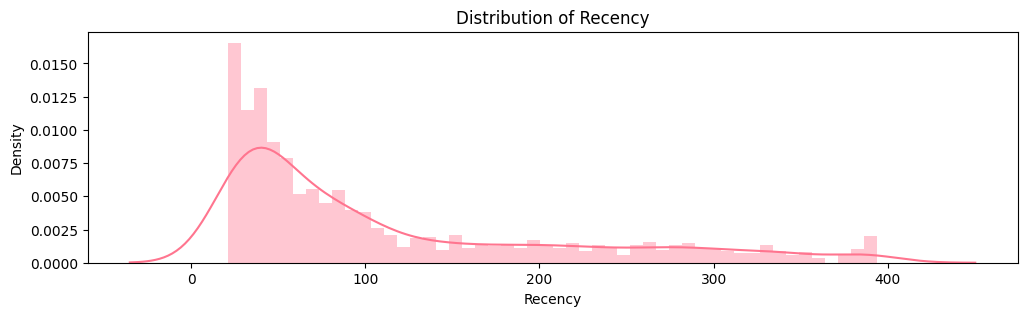

<ipython-input-29-c96781447406>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col], bins = 50, color = '#FF758F')


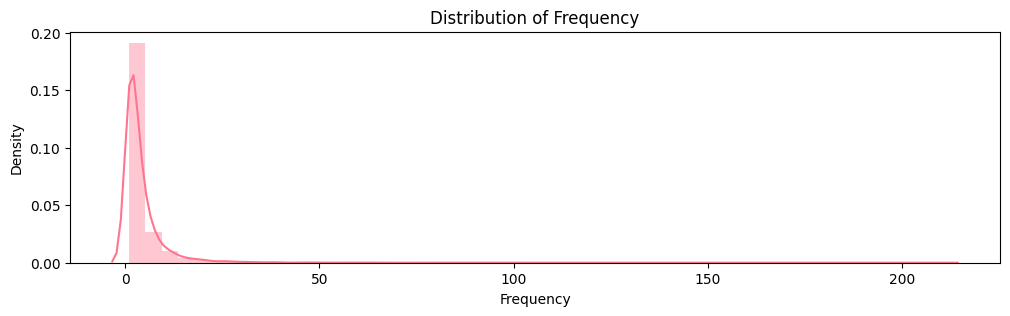

<ipython-input-29-c96781447406>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[col], bins = 50, color = '#FF758F')


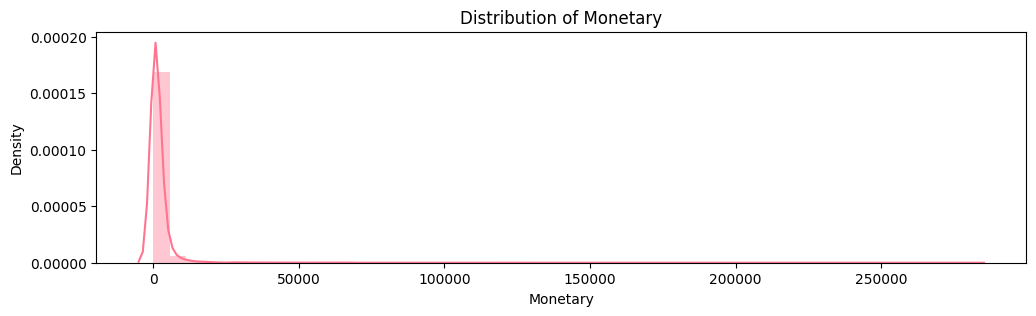

In [29]:
colnames = ['Recency','Frequency','Monetary']
for col in colnames:
  fig, ax = plt.subplots(figsize = (12,3))
  sns.distplot(rfm[col], bins = 50, color = '#FF758F')
  #ax.set_xlim(0,400)
  ax.set_title('Distribution of %s' % col)
  plt.show()

In [30]:
grp = group.groupby('Segment').agg({'CustomerID': 'count',
                                     'Monetary': 'sum',
                                     'Recency': 'mean'}).reset_index()
grp.columns = ['Segment', 'Cust_count', 'Total_monetary', 'Avg_recency']
grp.sort_values(by='Cust_count', ascending=False, inplace=True)
grp

,Segment,Cust_count,Total_monetary,Avg_recency
3,Champions,834,5591628.710,31.841727
4,Hibernating customers,693,282747.332,170.591631
5,Lost customers,484,96341.980,296.016529
6,Loyal,427,1016384.900,57.025761
1,At Risk,424,750887.431,164.445755
9,Potential Loyalist,411,221408.990,47.282238
0,About To Sleep,286,78743.090,106.954545
7,Need Attention,286,466255.331,53.979021
8,New Customers,269,59674.930,48.776952
10,Promising,133,119099.520,45.654135


In [31]:
grp['Count_share'] = grp['Cust_count'] / grp['Cust_count'].sum()
grp['Monetary_share'] = grp['Total_monetary'] / grp['Total_monetary'].sum()
grp

,Segment,Cust_count,Total_monetary,Avg_recency,Count_share,Monetary_share
3,Champions,834,5591628.710,31.841727,0.192210,0.629177
4,Hibernating customers,693,282747.332,170.591631,0.159714,0.031815
5,Lost customers,484,96341.980,296.016529,0.111546,0.010841
6,Loyal,427,1016384.900,57.025761,0.098410,0.114365
1,At Risk,424,750887.431,164.445755,0.097718,0.084491
9,Potential Loyalist,411,221408.990,47.282238,0.094722,0.024913
0,About To Sleep,286,78743.090,106.954545,0.065914,0.008860
7,Need Attention,286,466255.331,53.979021,0.065914,0.052464
8,New Customers,269,59674.930,48.776952,0.061996,0.006715
10,Promising,133,119099.520,45.654135,0.030652,0.013401


### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |

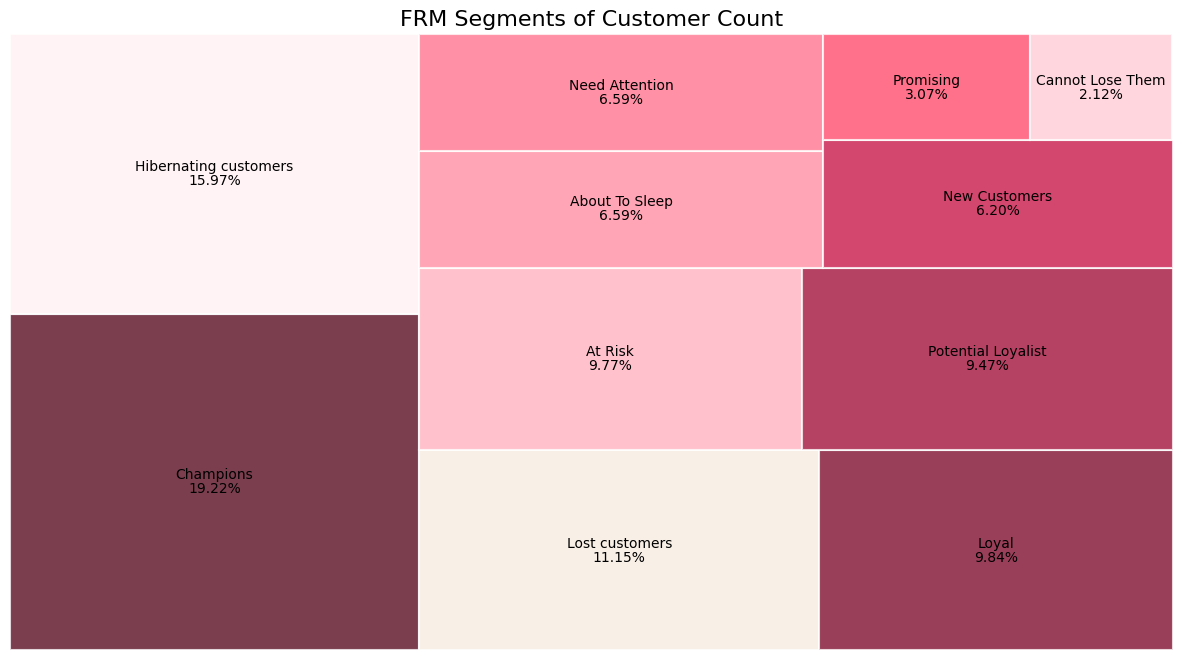

In [32]:
colors = ['#590D22','#FFF0F3','#F7EBE0','#800F2F','#FFB3C1','#A4133C','#FF8FA3','#FF758F','#C9184A', '#FF4D6D','#FFCCD5']
#590D22 #800F2F #A4133C #C9184A #FF4D6D #FF758F #FF8FA3 #FFB3C1 '#FFCCD5 #FFF0F3 #F7EBE0
fig, ax = plt.subplots(1, figsize = (15,8))
squarify.plot(sizes = grp['Cust_count'],
              label = grp['Segment'],
              value = [f'{x*100:.2f}%' for x in grp['Count_share']],
              alpha = .8,
              color = colors,
              bar_kwargs = dict(linewidth = 1.5, edgecolor = "white")
              )
plt.title('FRM Segments of Customer Count', fontsize = 16)
plt.axis('off')
plt.show()

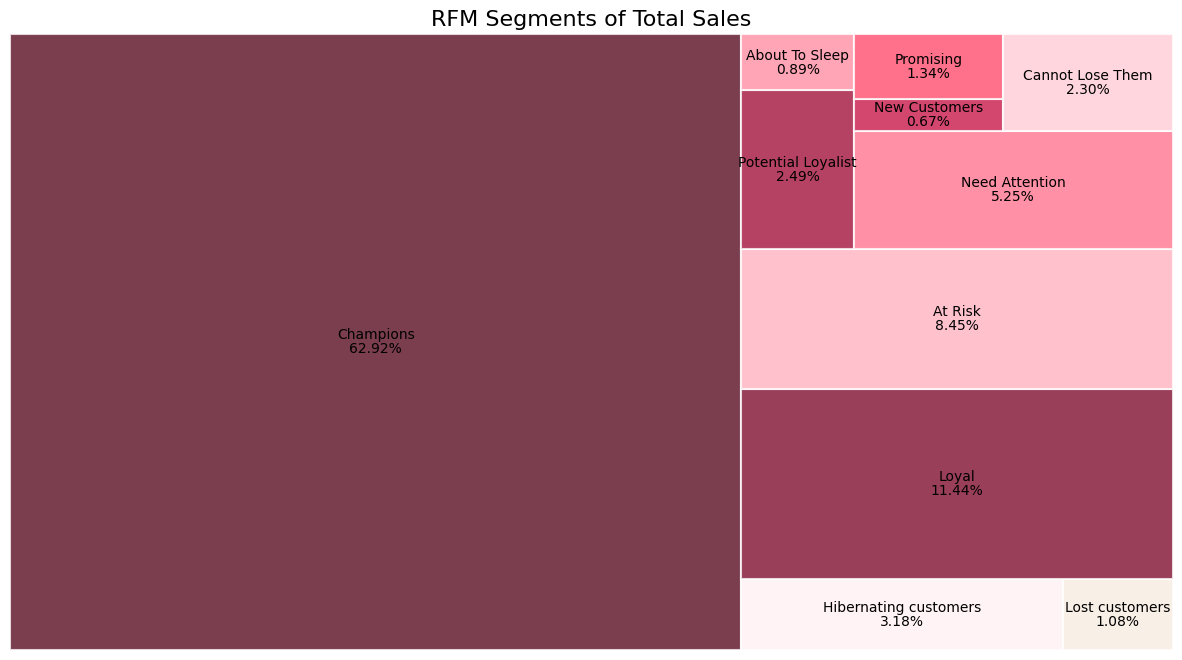

In [33]:
#colors = ['#FF0000','#00FFFF','#FFFF00','#A52A2A','#800080','#00FF00','#808000','#FFC0CB','#FFA500','#FF00FF','#736F6E']

fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes=grp['Monetary_share'],
              label=grp['Segment'],
              value=[f'{x*100:.2f}%' for x in grp['Monetary_share']],
              alpha=.8,
              color=colors,
              bar_kwargs=dict(linewidth=1.5, edgecolor="white")
             )
plt.title('RFM Segments of Total Sales', fontsize=16)
plt.axis('off')
plt.show()

In [34]:
median_R = group.groupby('Segment')['Recency'].median().reset_index()#.sort_values(by=['Recency'], ascending = True)
median_R = median_R.rename(columns={"Recency": "Median_recency"})

median_F = group.groupby('Segment')['Frequency'].median().reset_index()
median_F = median_F.rename(columns={"Frequency": "Median_frequency"})

median_M = group.groupby('Segment')['Monetary'].median().reset_index()
median_M = median_M.rename(columns={"Monetary": "Median_monetary"})

med = grp.merge(median_R, on='Segment').merge(median_F, on='Segment').merge(median_M, on='Segment')
med

,Segment,Cust_count,Total_monetary,Avg_recency,Count_share,Monetary_share,Median_recency,Median_frequency,Median_monetary
0,Champions,834,5591628.710,31.841727,0.192210,0.629177,29.0,8.0,2984.345
1,Hibernating customers,693,282747.332,170.591631,0.159714,0.031815,149.0,1.0,371.890
2,Lost customers,484,96341.980,296.016529,0.111546,0.010841,290.0,1.0,177.860
3,Loyal,427,1016384.900,57.025761,0.098410,0.114365,57.0,5.0,1614.910
4,At Risk,424,750887.431,164.445755,0.097718,0.084491,140.5,3.0,1167.710
5,Potential Loyalist,411,221408.990,47.282238,0.094722,0.024913,43.0,2.0,553.440
6,About To Sleep,286,78743.090,106.954545,0.065914,0.008860,91.0,1.0,208.195
7,Need Attention,286,466255.331,53.979021,0.065914,0.052464,51.0,3.0,930.715
8,New Customers,269,59674.930,48.776952,0.061996,0.006715,45.0,1.0,199.480
9,Promising,133,119099.520,45.654135,0.030652,0.013401,37.0,1.0,664.110


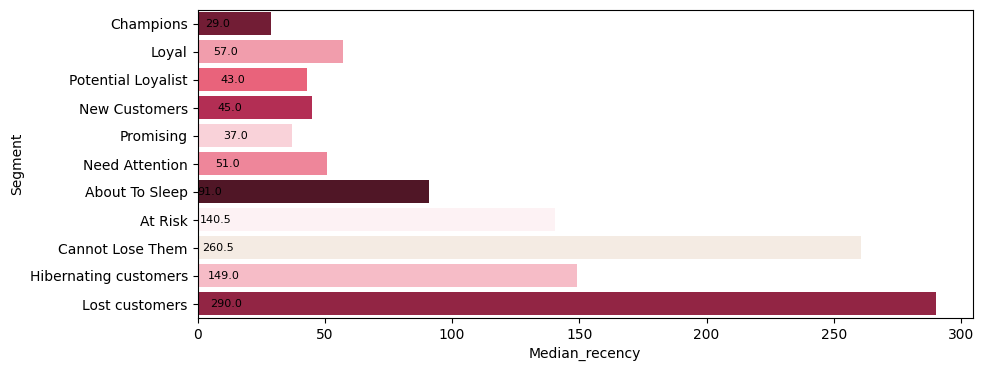

In [35]:
orders = ['Champions','Loyal','Potential Loyalist','New Customers','Promising','Need Attention','About To Sleep','At Risk','Cannot Lose Them','Hibernating customers','Lost customers']
def addlabels(x,y):
    for i in range(len(y)):
        plt.text(i, y[i], x[i], fontsize=8, verticalalignment='center')

plt.figure(figsize=(10, 4))
r = sns.barplot(data=median_R,
                x='Median_recency',
                y='Segment',
                hue = 'Segment',
                palette = colors,
                order = orders,
                legend=False)
addlabels(median_R['Median_recency'],median_R['Segment'])
plt.show()

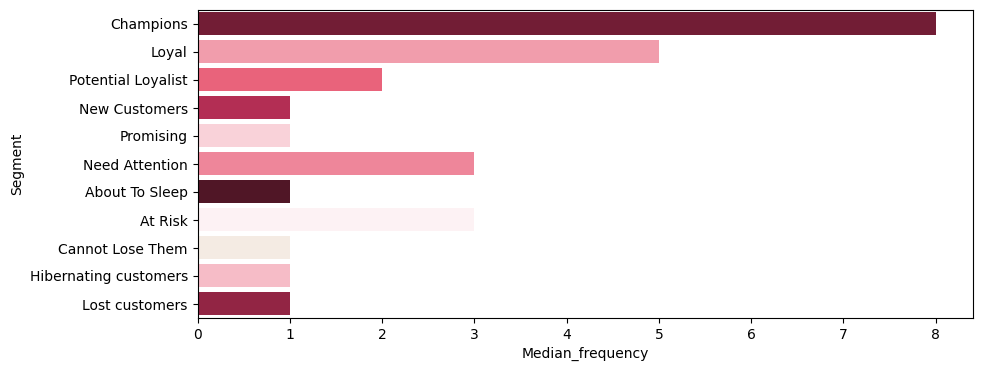

In [36]:
plt.figure(figsize=(10, 4))
f = sns.barplot(data=median_F,
                x='Median_frequency',
                y='Segment',
                hue = 'Segment',
                palette = colors,
                order = orders,
                legend=False)
#addlabels(median_F['Median_frequency'],median_F['Segment'])
plt.show()

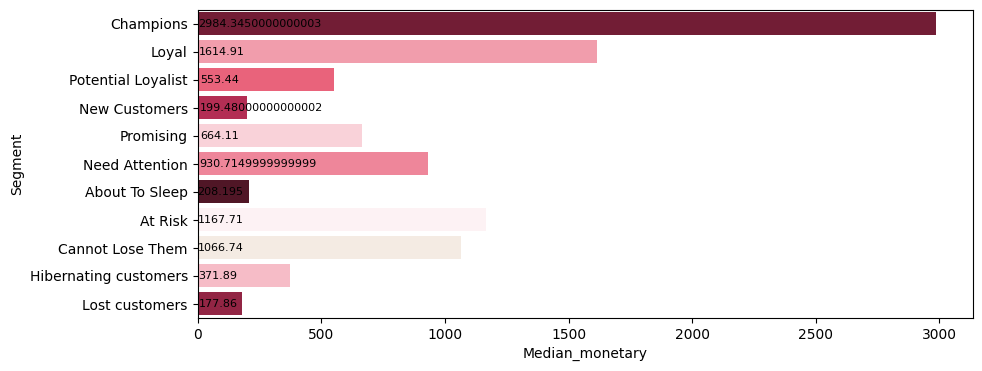

In [37]:
plt.figure(figsize=(10, 4))
m = sns.barplot(data=median_M,
                x='Median_monetary',
                y='Segment',
                hue = 'Segment',
                palette = colors,
                order = orders,
                legend=False)
addlabels(median_M['Median_monetary'],median_M['Segment'])
plt.show()

In [38]:
bycountry = group.merge(delivered,how='inner',on='CustomerID')
revenue = bycountry.groupby('Country')['Revenue'].sum().reset_index()
bycountry = bycountry.groupby('Country')['CustomerID'].count().reset_index().rename(columns={"CustomerID": "cnt_customer"}).sort_values(by ='cnt_customer', ascending=False)
bycountry = bycountry.merge(revenue, how='left', on='Country')
bycountry

,Country,cnt_customer,Revenue
0,United Kingdom,349227,7285024.644
1,Germany,9027,228678.400
2,France,8327,208934.310
3,EIRE,7228,265262.460
4,Spain,2480,61558.560
5,Netherlands,2363,285446.340
6,Belgium,2031,41196.340
7,Switzerland,1842,56443.950
8,Portugal,1453,33375.840
9,Australia,1184,138453.810


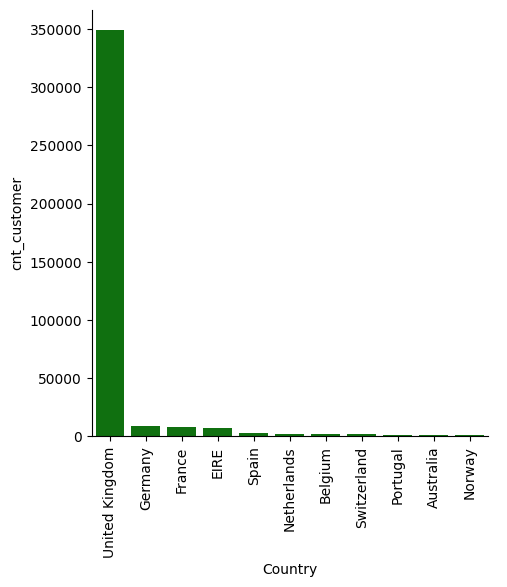

In [39]:
sns.catplot(x='Country',
            y='cnt_customer',
            data=bycountry[bycountry['cnt_customer']>=1000],
            kind='bar',
            color='green')
plt.xticks(rotation=90)
plt.show()

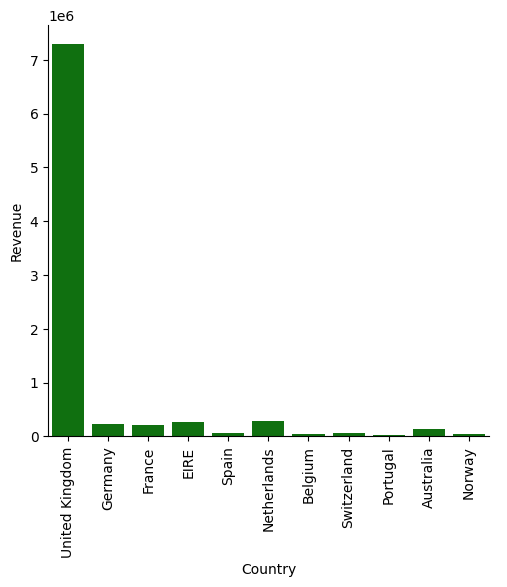

In [40]:
sns.catplot(x='Country',
            y='Revenue',
            data=bycountry[bycountry['cnt_customer']>=1000],
            kind='bar',
            color='green')
plt.xticks(rotation=90)
plt.show()

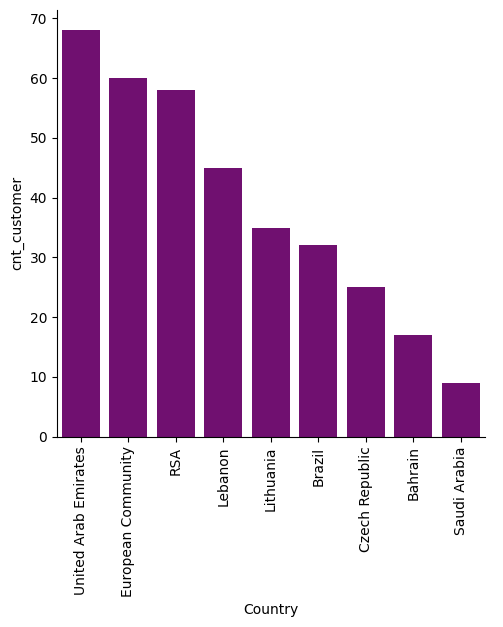

In [41]:
sns.catplot(x='Country',
            y='cnt_customer',
            data=bycountry[bycountry['cnt_customer']<100],
            kind='bar',
            color='purple')
plt.xticks(rotation=90)
plt.show()

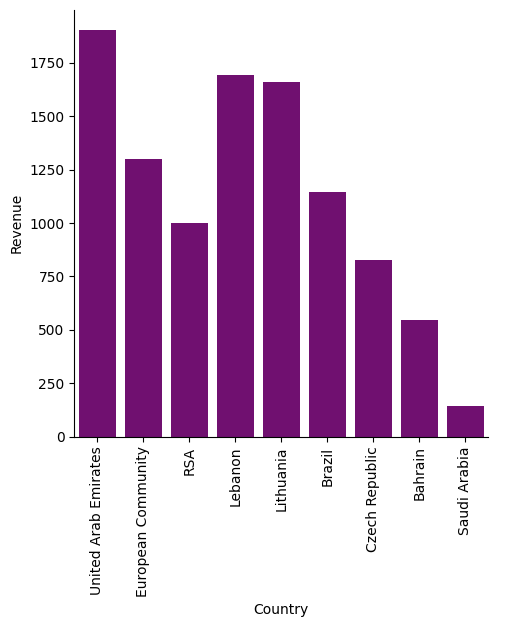

In [42]:
sns.catplot(x='Country',
            y='Revenue',
            data=bycountry[bycountry['cnt_customer']<100],
            kind='bar',
            color='purple')
plt.xticks(rotation=90)
plt.show()

# Insights




Doanh thu của công ty đa số đến từ các KH United Kingdom với số lượng hơn 354K khách hàng với doanh thu 7,3M - chênh lệch lớn so với các quốc gia còn lại. Ngược lại, Saudi Arabia là quốc gia có số lượng KH ít nhất (9 KH) và doanh thu chỉ 145K.

Phân phối KH trên thang điểm:

- Về khoảng cách từ ngày mua cuối cùng đến ngày mốc: Tính theo mốc 31/12/2011, tỷ lệ KH mua hàng gần nhất phổ biến là khoảng 25-60 ngày và dưới 100 ngày. Các khoảng thời gian từ 120 ngày đến 1 năm có mật độ tương đối đồng đều. Biểu đồ lệch trái mang ý nghĩa tích cực.
- Về tần suất mua hàng và số tiền chi mua: Chủ yếu là những giá trị thấp chiếm mật độ cao.

Phân khúc KH theo mô hình RFM:
- Chiếm tỷ lệ cao nhất là nhóm KH Champions (19,2%), tiếp đó là Hibernating customers (15,99%) và Lost customers (11,2%). Nếu theo tiên đề: “80% doanh thu doanh nghiệp đến từ 20% khách hàng” thì thực trạng đang rất tốt với nhóm Champions vì là nhóm mang lại doanh thu và lợi nhuận lớn nhất. → Có những ưu đãi tương xứng như: Cung cấp cho họ các ưu đãi độc quyền nhưng không nên ưu đãi về giá, triển khai phần thưởng cho khách hàng thân thiết cho khách hàng thân thiết, thông tin về các sản phẩm mới, mời họ để lại đánh giá cho bạn để nâng cao hình ảnh thương hiệu.

  Tuy nhiên 2 phân khúc KH cao còn lại cho thấy lượng KH mà đã lâu không quay lại mua hàng và mua ít rất cao. Nhóm KH Hibernating cần áp dụng chiến lược marketing để thu hút sự quan tâm trở lại như chia sẻ video cấp cao về thương hiệu thể hiện sứ mệnh/bản chất thương hiệu công ty, các bài đăng trên blog, phương tiện truyền thông xã hội...

  Còn những KH thuộc phân khúc Lost thì có thể bỏ qua để tiết kiệm chi phí.
  
- Nhóm KH tiếp theo sau Champions có thể mang lại doanh thu cao cho công ty là Loyal và Potential Loyalist chiếm tỷ lệ khoảng 9,5 - 9,9% nên cần quan tâm nhóm này để nâng cao tỷ lệ hơn nữa.

  Loyal rất quan tâm đến sản phẩm của công ty nhưng mức độ gần đây của họ không cao lắm. Có thể thực hiện: Quảng cáo phần thưởng khách hàng thân thiết, thông báo về các bản phát hành sản phẩm mới, mời họ đăng ký, theo dõi trên mạng xã hội để nâng cao trải nghiệm thương hiệu. Theo biểu đồ về trung vị của số ngày mua gần nhất, nhóm Loyal đang có giá trị khá cao 58 ngày (gấp đôi Champions và cao hơn Potential Loyalist) nên cần tập trung làm giảm Recency.

  Potential Loyalist quan tâm đến sản phẩm nhưng chưa đạt được mức độ yêu thích hoặc trung thành với thương hiệu như mong muốn. Mức chi tiêu vào sản phẩm của công ty của nhóm này khá thấp (top4 thấp nhất với 563,23K) do chưa có giải pháp hiệu quả hơn khai thác nhóm khách hàng tiềm năng để biến họ thành những khách hàng thân thiết → Cần nâng cao giá trị thương hiệu với các biện pháp như: Mời họ theo dõi công ty trên mạng xã hội, tham gia các trải nghiệm xoay quanh sản phẩm…

- Đứng thứ 3 về mức chi tiêu và tần suất mua hàng (sau Champions và Loyal) là nhóm KH At Risk với số lượng KH chiếm 9,7%. Tuy rủi ro cao nhưng nhóm này cũng đóng góp vào doanh thu công ty không ít. → Dựa trên mức độ sẵn lòng chi tiêu trước đây của họ và tần số mua hàng ở mức tương đối (trung vị 3 lần), cung cấp chương trình mua 1 tặng 1, kết hợp các sản phẩm trước đây đã mua với các sản phẩm bổ sung mới có thể thu hút họ tiếp tục quay lại…

- Nhóm KH chiếm tỷ lệ ít nhất là Cannot Lose them (2,12%). Mặc dù nhóm dành số tiền khá lớn mua hàng (xếp thứ 4 với 1,075M) nhưng đã rất lâu không quay lại mua hàng lần 2 (trung vị cao thứ 2 sau nhóm Lost với 260 ngày) → Thu hút sự chú ý của họ bằng mức giảm giá, thông tin về sản phẩm độc đáo mới…

- Nhóm KH có số ngày mua hàng gần thứ 2 sau Champions là Promising (38 ngày) nhưng tần suất thấp → Mời họ tham gia khảo sát để nhận phần thưởng giúp để lại ấn tượng và khuyến khích quay lại mua hàng lần sau.

- Nhóm KH chiếm khoảng 6% là New Customers (6,15%), Need Attention (6,43%) và About to sleep (6,59%). Các hành động marketing đều đã được kể trên.

-->  Ưu tiên các chiến lược, chương trình dành cho hai phân khúc khách hàng VIP với kỳ vọng mang lại doanh số giải ngân và lợi nhuận tốt nhất cho công ty là Champions và Loyal Customers (chú ý R_score). Có chính sách nâng cao thương hiệu hướng tới nhóm phân khúc khách hàng Hibernating và Potential Loyalist nhằm khai thác một lượng lớn khách hàng và khách hàng tiềm năng trở thành khách hàng thân thiết mang lại lợi nhuận lâu dài cho công ty. Xem xét các sản phẩm phù hợp cho chương trình mua 1 tặng 1, giảm giá khi áp dụng với nhóm At Risk
